In [16]:
# Decison Tree
from sklearn.datasets import load_iris

# The load_iris() method can return 3 different data types.
# Default: type=sklearn.utils.Bunch has attributes data and target.
# With as_frame=True, returns a Pandas DataFrame.
# With return_X_y, returns (data,target)
iris = load_iris()
# use 2 of 3 features: petal length & width
X = iris.data[:,2:] 
y = iris.target

In [30]:
# Do not scale or center features for decision trees.
# SKLearn only makes binary trees (using CART algorithm).
# See ID3 for other kinds of trees.
# First, underfit with max depth 1
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc1.fit(X,y)  # overfit! no validation data

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]')]

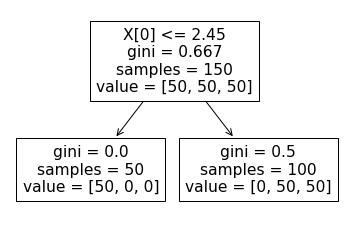

In [31]:
# The book uses graphviz to visualize the tree.
# The only way to install it on Mac is with xcode which I don't have.
# I tried an alternative, gephi, which can read the dot file.
# It renders the tree but not the node labels (at least for me).

# Try this instead.
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
from sklearn import tree
tree.plot_tree(dtc1)
# Gini is importance: Normalized total reduction of criteria by feature.
# Gini is impurity: One minus sum of squared probabilties the instances belong together.

In [32]:
# Use the tree to predict probabilities.
dtc1.predict_proba([[5,1.5]])

array([[0. , 0.5, 0.5]])

In [33]:
# Use the tree to predict a class.
dtc1.predict([[5,1.5]])

array([1])

In [34]:
# Decision tree classifier hyperparameters.

# Decision trees tend to overfit.
# Some algorithms prune the tree based on p-values.
# The sklearn DT can be regularized with max_depth and min_samples_per_leaf.
# Here we approach overfit by increasing max_depth.
# Eventually, each training instance could be its own node.
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc2.fit(X,y)  

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

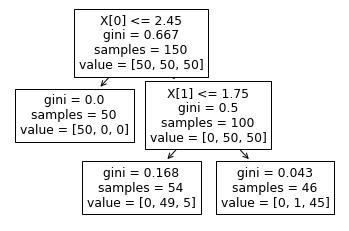

In [37]:
tree.plot_tree(dtc2)

In [38]:
dtc2.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

[Text(125.55000000000001, 190.26, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

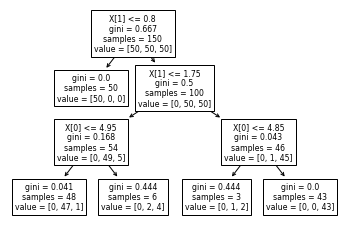

In [39]:
dtc3 = DecisionTreeClassifier(max_depth=3)
dtc3.fit(X,y)  
tree.plot_tree(dtc3)

In [40]:
dtc3.predict_proba([[5,1.5]])

array([[0.        , 0.33333333, 0.66666667]])

[Text(125.55000000000001, 190.26, 'X[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

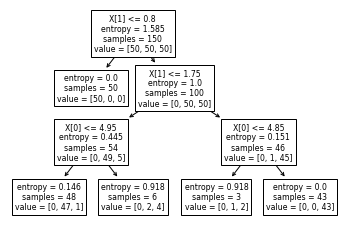

In [41]:
# The SKLearn DT can minimize impurity or entropy (constructor parameter).
# As seen above, impurity tends to clump largest class in one sample: [50,0,0].
# Book says using entropy, it tends to make a balanced tree. 
# But in this case, it makes no difference.
dtc4 = DecisionTreeClassifier(max_depth=3,criterion="entropy")
dtc4.fit(X,y)  
tree.plot_tree(dtc4)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\nmse = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nmse = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.021\nsamples = 46\nvalue = 1.978')]

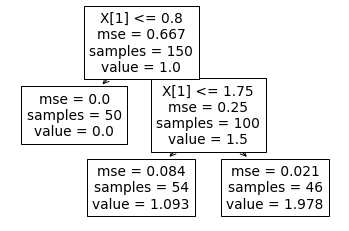

In [49]:
# Regression.

# Use DT to give a score (not a class).
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2) # no option criterion="entropy"
dtr.fit(X,y)  
tree.plot_tree(dtr)

In [50]:
dtr.predict([[5,1.5]])

array([1.09259259])